# Assignment 2: Classification and Evaluation (20 marks)

Student Name: Arya Araban

Student ID: 1439683

## General info

<b>Due date</b>: *5 pm on Friday 7th of April*

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2;</li>
    <li>two days late, -4;</li>
    <li>three days late, -6;</li>
    <li>four days late, -8;</li>
    <li>five days late, -10;</li>
</ul>

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages `numpy`, `pandas`, `matplotlib` and `sklearn`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 


<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where collusion or plagiarism are deemed to have taken place. Content produced by an AI (including, but not limited to ChatGPT) is not your own work, and submitting such content will be treated as a case of academic misconduct, in line with the <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies"> University's policy</a>.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, -2.0
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, -1.0
</UL>


## Overview:
For this assignment, you will work with a provided dataset to train and utilize multiple classifiers to analyze different versions of the dataset. In addition to implementing these classifiers, you will also explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. Finally, you will be expected to answer some conceptual questions based on your observations and analysis.

## Data Set:
In this assignment, you will work with multiple versions of one dataset called "Amphibians." It is adopted from a famous public dataset, and you can find more details about it <a href= "https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a>.  The dataset includes information about five groups of amphibians in Poland: "Green frogs," "Brown frogs," "Common toad," "Tree frog," and "Fire-bellied toad." The dataset comprises 14 attributes and one class. Some of these attributes are numeric, some are categorical, and some are ordinal.

You can find details about all the features in the dataset in the file "README.txt".

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [4]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1 [5 marks]
**Q1.1 A.** Read the dataset "amphibians1.csv" dataset into a pandas DataFrame called `data1`. Create a function called `encode` that takes in the features of the dataset as a pandas DataFrame and uses one-hot encoding to convert all nominal (and ordinal) attributes to numeric. You can achieve this by either using `get_dummies()` from the pandas library or `OneHotEncoder()` from the scikit-learn library. **[1 mark]**

**B.** For 10 rounds, use `train_test_split` to divide the encoded `data1` into 70% train, 30% test . Set the `random_state` equal to the loop counter. For example in the loop
``` python 
for i in range(10):
```
make `random_state` equal to `i`. 
Use the splitted datasets to train and test the following models (use the default hyperparameters): **[1 mark]**
- Zero-R
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Bernoulli Naive Bayes model

Report the average accuracy over the 10 runs.

In [5]:
data1 = pd.read_csv("drive/MyDrive/datasets/ML_A2/amphibians1.csv")

y1 = data1.iloc[:, -1]
X1 = data1.iloc[:, :-1]


In [6]:
# preprocessing 
def encode(X):

    nominal_columns = ["TR", "VR", "SUR1", "SUR2", "SUR3", "UR", "FR", "RR", "BR", "MR", "CR" ]
    for col in nominal_columns:

      dummies = pd.get_dummies(X[col], prefix=col)
      
      X = X.drop(columns=[col])

      X = pd.concat([X, dummies], axis=1)

    return X 

In [7]:
ZeroR_Acc_1 = []
GNB_Acc_1 = []
MNB_Acc_1 = []
BNB_Acc_1 = []

round_num = 2
round_reports = {}

encoded_data = encode(data1)

X = encoded_data.drop(columns=['frog class'])
y = encoded_data['frog class']

warnings.filterwarnings('ignore')

for i in range(10):

  X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=i)
   

  # Training/testing the Zero-R model
  zero_r = DummyClassifier(strategy='most_frequent')
  zero_r.fit(X_train, y_train)
  y_pred = zero_r.predict(X_test)
  ZeroR_Acc_1.append(accuracy_score(y_test, y_pred))

  if i == round_num: 
    round_reports["Zero_R"] = classification_report(y_test, y_pred, labels=np.unique(y_test))
  
  # Training/testing the Gaussian Naive Bayes model
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  GNB_Acc_1.append(accuracy_score(y_test, y_pred))
  
  if i == round_num:
    round_reports["GNB"] = classification_report(y_test, y_pred, labels=np.unique(y_test))
  
  # Training/testing the Multinomial Naive Bayes model
  mnb = MultinomialNB()
  mnb.fit(X_train, y_train)
  y_pred = mnb.predict(X_test)
  MNB_Acc_1.append(accuracy_score(y_test, y_pred))

  if i == round_num:
    round_reports["MNB"] = classification_report(y_test, y_pred, labels=np.unique(y_test))
  
  # Training/testing the Bernoulli Naive Bayes model
  bnb = BernoulliNB()
  bnb.fit(X_train, y_train)
  y_pred = bnb.predict(X_test)
  BNB_Acc_1.append(accuracy_score(y_test, y_pred))

  if i == round_num:
    round_reports["BNB"] = classification_report(y_test, y_pred, labels=np.unique(y_test))



print("Accuracy of ZeroR:", np.mean(ZeroR_Acc_1).round(2))
print("Accuracy of GNB:", np.mean(GNB_Acc_1).round(2))
print("Accuracy of MNB:", np.mean(MNB_Acc_1).round(2))
print("Accuracy of BNB:", np.mean(BNB_Acc_1).round(2))


Accuracy of ZeroR: 0.59
Accuracy of GNB: 0.4
Accuracy of MNB: 0.35
Accuracy of BNB: 0.63


**Q1.2** After comparing the performance of the different models on the classification task, please comment on any differences or lack of differences you observe between the models. **[3 marks]**</br>
*NOTE: You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

In [8]:
for k, v in round_reports.items():
    print(f"{k}: \n\n")
    print(v)
    print("------")

Zero_R: 


                   precision    recall  f1-score   support

       Brown frog       0.00      0.00      0.00        21
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.54      1.00      0.70        29
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.54        54
        macro avg       0.11      0.20      0.14        54
     weighted avg       0.29      0.54      0.38        54

------
GNB: 


                   precision    recall  f1-score   support

       Brown frog       0.53      0.38      0.44        21
      Common toad       0.12      0.50      0.20         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.71      0.41      0.52        29
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.39        54
        macro avg       0

It is apparent from the obtained results, that the BNB model had the highest overall accuracy, with the mean accuracy of 0.63, followed by Zero-R (0.59), GNB (0.40), and MNB (0.35). 

We note that accuracy shouldn't always be considered as the best evaluation metric, since it can be misleading when the classes of the data are imbalanced.
In such cases, a model that simply predicts the majority class for all instances can achieve a high accuracy, but it may not be useful in practice.
Metrics such as Precision and Recall provide more detailed information about the performance of a classification model compared to accuracy, and in the case of imbalanced data, may give us much more insight. Therefore, to better understand the performance of each classification model on each of the different classes, we can look at the precision, recall, and F1-score performance metrics 


By analyzing the classification report for each of the models in one round, we can gather useful insight by comparing the overall performance of each model.

For the ZeroR model, it can be seen that all of the precision/recall values for classes besides Green frog are being considered as 0. This is due to the fact that ZeroR basically predicts the current class as being the class that is seen the most in the training data (which in this case, is Green frog). If we look at the recall value for this class in ZeroR, we see that it is 1. We know that recall measures the percentage of true positive cases that were correctly identified by a classification model (with the formula being TP / (TP + FN)) and since all classes are being predicted as positive for the Green frog class (meaning there are no false negatives), the resulting recall will be TP/TP = 1. This simple model achieving a mean accuracy of 59% suggests that the data is highly imbalanced and a very high percentage of the instances are labelled as being Green Frogs. 


Even though the BNB model has the highest overall accuracy, it's apparent that it is showing zero precision and recall for Common toad, Fire-bellied toad, and Tree frog classes, meaning that it has failed to correctly identify any instances of these particular classes.
So overall, this model only has a high rate of successful predictions for Brown Frog and Green Frog. As we have previously gathered, the data is highly imbalanced and since the BNB model is only successfuly predicting these two classes, we can conclude this model might not be that good of a classifier that the achieved accuracy would suggests, since we are looking for model which is able to achieve predicting all classes with a reasonable success rate. 

Both the GNB and MNB models have relatively high precision and recall values for the Green frog class but lower values for all other classes. This suggests that the these models are good at correctly identifying instances of the Green frog class but not as good at identifying instances of other classes. Having said that, this model at least has non-zero precision and recall values for the Common toad class, which means they might generalize a bit better compared to the BNB model.  


Overall, it seems that none of the models are particularly good at correctly identifying instances of all classes. The BNB model has the best overall performance in terms of precision and recall for both the Green frog and Brown frog classes but fails to correctly identify any instances of the Common toad, Fire-bellied toad, and Tree frog classes. This is while the GNB and MNB models have low non-zero precision and recall values for Common toad, alongside their values for Brown Frog and Tree Frog, indicating that they might have a slight edge in performance for predicting this specific class compared to BNB. 

## Question 2 [5 marks]

**Q2.1.** Divide the `data1` into 70% train and 30% test splits for 10 rounds, set the `random_state` equal to the loop counter. Then, train and test **K-Nearest Neighbor algorithms (with K values of 1, 5, and 20)**, using Euclidean distance as the distance metric and maximum vote (no weighting) to determine the label. Finally, report the average accuracy of the KNN models over the 10 runs. **[1 mark]**

In [9]:
KNN1_Acc_1 = []
KNN5_Acc_1 = []
KNN20_Acc_1 = []


from sklearn.neighbors import KNeighborsClassifier

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)


  # Training/testing the KNN1 model
  knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
  knn1.fit(X_train, y_train)
  KNN1_Acc_1.append(knn1.score(X_test, y_test))

  # Training/testing the KNN5 model
  knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
  knn5.fit(X_train, y_train)
  KNN5_Acc_1.append(knn5.score(X_test, y_test))

  # Training/testing the KNN20 model
  knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform', metric='euclidean')
  knn20.fit(X_train, y_train)
  KNN20_Acc_1.append(knn20.score(X_test, y_test))



            
print("Accuracy of KNN(1):", np.mean(KNN1_Acc_1).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_1).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_1).round(2))


Accuracy of KNN(1): 0.56
Accuracy of KNN(5): 0.6
Accuracy of KNN(20): 0.61


**Q2.2.A.** Create a function called `normalise` that takes the features of the dataset as a pandas DataFrame and scales all numeric attributes to the range of 0-1. You can either use `MinMaxScaler` from the `sklearn.preprocessing` library or implement the normalization step yourself.
**B.** For 10 rounds divide the normalised "data1" into 70% train and 30% test splits using set the `random_state` equal to the loop counter, and run the KNN models (k=1,5 and 20). Report the average accuracy of your KNN models over these 10 runs. **[1 mark]**

In [10]:
from sklearn.preprocessing import MinMaxScaler
# preprocessing 
def normalise(X):
    scaler = MinMaxScaler()
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    return X

In [11]:
######################################## POSSIBLE SOLUTION #############################################

KNN1_Acc_2 = []
KNN5_Acc_2 = []
KNN20_Acc_2 = []

X_scaled = normalise(X)

round_num = 2

round_reports_d1_knn = {}

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)


  # Training/testing the KNN1 model
  knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
  knn1.fit(X_train, y_train)
  y_pred = knn1.predict(X_test)
  KNN1_Acc_2.append(knn1.score(X_test, y_test))

  if i == round_num:
        round_reports_d1_knn["KNN1"] = classification_report(y_test, y_pred, labels=np.unique(y_test))

  # Training/testing the KNN5 model
  knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
  knn5.fit(X_train, y_train)
  y_pred = knn5.predict(X_test)
  KNN5_Acc_2.append(knn5.score(X_test, y_test))

  if i == round_num:
        round_reports_d1_knn["KNN5"] = classification_report(y_test, y_pred, labels=np.unique(y_test))

  # Training/testing the KNN20 model
  knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform', metric='euclidean')
  knn20.fit(X_train, y_train)
  y_pred = knn20.predict(X_test)
  KNN20_Acc_2.append(knn20.score(X_test, y_test))

  if i == round_num:
        round_reports_d1_knn["KNN20"] = classification_report(y_test, y_pred, labels=np.unique(y_test))



            
print("Accuracy of KNN(1):", np.mean(KNN1_Acc_2).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_2).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_2).round(2))


Accuracy of KNN(1): 0.54
Accuracy of KNN(5): 0.58
Accuracy of KNN(20): 0.63


**Q2.3** Compare the results of the KNN models (for each value of K) in Q2.1 and Q2.2, and discuss any differences you observe. Did the preprocessing step in Q2.2 improve the performance of the KNN models? Why or why not? **[3 marks]**

If we compare the results of the KNN models, we can see that scaling the numeric features to be between the range of 0-1 did not improve the performance of the KNN models for K=1 and K=5. However in the case of K=20, it improved the performance. 

After scaling the features, For K=1, the accuracy decreased from 0.56 to 0.54. Similarly, for K=5, the accuracy decreased from 0.6 to 0.58. This suggests that in these two cases, scaling the features had a negative effect on the performace of the models.

In the case of K=20, by scaling the features, the accuracy increased from 0.61 to 0.63, which suggests that scaling the features had a positive effect on the performance of this model.

The main reason to scale the features before using KNN is to avoid the situation where some features with larger values have a negative influence on the distance calculations. Without scaling, features with larger values can dominate the distance calculations and make the algorithm less accurate. Generally, this scaling of features can help to ensure that the distances between samples are calculated more accurately. However, as we have seen with the our results, scaling doesn't necessarily lead to higher accuracy. In some cases, scaling can introduce additional noise or distortions in the data, which can lead to worse performance of KNN.

In our example, we saw that for small K values (K=1 or K=5) scaling had a negative effect. When K is small, performance of KNN is very sensitive to the local structure of the data. This local structure is heavily modified after applying scaling, thus having potential to cause worse prediction results on the data. On the other hand, when K is large (K=20 in our case), the performance of KNN is less dependant on the local structure, and captures more of the general trend of the data, thus leading to better accuracy results. 




## Question 3 [5 marks]

**Q3.1.** Read the "amphibians2.csv" into `data2` and  "amphibians1.csv" into `data1_2`. Observe any differences in the values of the feature "SR" between these two datasets, and explain why you think these changes were made (provide your hypothesis). Use diagrams such a histograms or boxplots to check the distribution of the feature 'SR' before and after the change. **[2 marks]**

In [12]:
data2 = pd.read_csv("drive/MyDrive/datasets/ML_A2/amphibians2.csv")
data1_2 = pd.read_csv("drive/MyDrive/datasets/ML_A2/amphibians1.csv")

        SR  NR  TR  VR  SUR1  SUR2  SUR3  UR  FR   OR  RR  BR  MR  CR  \
38   80000   1  12   4     2     2     7   0   0  100   5   5   0   1   
45   40000   1   1   1     2     2     6   3   2  100   5   0   0   1   
98   80000   2   1   1     7     6     2   3   4  100   2   2   0   1   
100  50000  10   1   4     2    10     6   0   0  100   2   2   0   1   
129  40000   4   1   1    10     7     6   3   4  100   1   1   0   1   

     frog class  
38   Green frog  
45   Green frog  
98   Green frog  
100  Green frog  
129  Green frog  


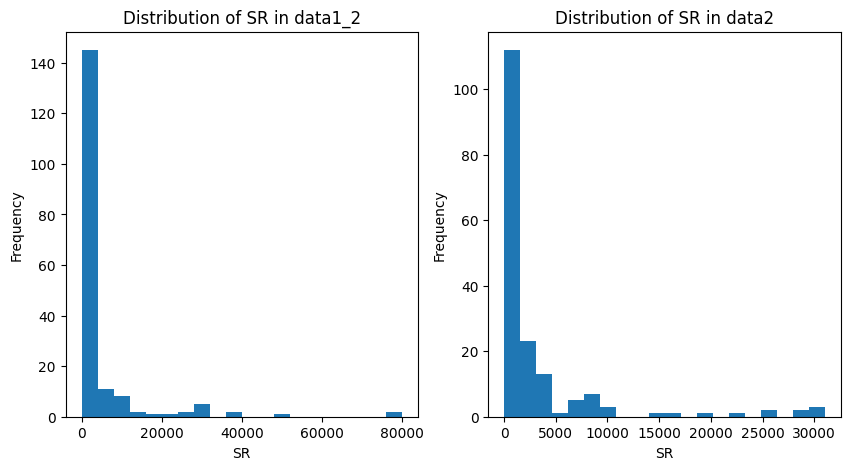

In [19]:
# by printing both dataframes with print(data1); print("\n------\n"); print(data2)
# it appears that the dataframes match each other, but only some of the rows have been dropped in data2.. 
# let's find the rows that have been dropped [uncomment following line to see instances of dropped rows]

print(pd.concat([data1_2, data2]).drop_duplicates(keep=False, inplace=False))

# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(data1_2['SR'], bins=20)
axs[0].set_title('Distribution of SR in data1_2')
axs[0].set_xlabel('SR')
axs[0].set_ylabel('Frequency')

axs[1].hist(data2['SR'], bins=20)
axs[1].set_title('Distribution of SR in data2')
axs[1].set_xlabel('SR')
axs[1].set_ylabel('Frequency')

# Show the plots
plt.show()

by analyzing the data and the two distribution histograms for the "SR" feature, it is apparent that in data2, all of the SR values higher than around 35000 were dropped. In the histogram for data1 we can see that only a very small portion of this data has values higher than 35000, with most of the distribution coming from values less than this number.

One of the main reasons to consider dropping rows with high "SR" values is that by doing this, the data may be more representative of the general population or distribution of the feature, without being skewed by extreme values.

**Q3.2** 
For 10 rounds split the `data2` and `data1_2` dataset into 70% training and 30% testing sets use the `random_state` equal to the loop counter. Train and test two **decision tree** classifier with all default hyper-parameters: one with `data1_2` and one with `data2`. Calculate and report the average accuracy of both models for 10 runs. **[1 mark]**

In [14]:
y1_2 = data1_2.iloc[:, -1]
X1_2 =  data1_2.iloc[:, :-1]

y2 = data2.iloc[:, -1]
X2 = data2.iloc[:, :-1]


In [15]:
DT_Acc_1_2 = []
DT_Acc_2 = []

round_num = 2
round_reports = {}


for i in range(10):

    X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(X1_2, y1_2, test_size=0.3, random_state=i)

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=i)
    

    classifier = DecisionTreeClassifier()

    # Training/testing the Decision Tree model on data1_2
    classifier.fit(X_train1_2, y_train1_2)
    y_pred1_2 = classifier.predict(X_test1_2)
  
    DT_Acc_1_2.append(accuracy_score(y_test1_2, y_pred1_2))

    if i == round_num:
      round_reports["data1_2"] = classification_report(y_test1_2, y_pred1_2, labels=np.unique(y_test1_2))

    # Training/testing the Decision Tree model on data2
    
    classifier.fit(X_train2, y_train2)
    y_pred2 = classifier.predict(X_test2)
    DT_Acc_2.append(accuracy_score(y_test2, y_pred2))

    if i == round_num:
      round_reports["data2"] = classification_report(y_test2, y_pred2, labels=np.unique(y_test2))





print("Accuracy of Decision Tree \tdata1_2:", np.mean(DT_Acc_1_2).round(2),"\tdata2:", np.mean(DT_Acc_2).round(2))

Accuracy of Decision Tree 	data1_2: 0.55 	data2: 0.53


**Q3.3** Compare and analyze the performance of the **decision tree** classifier on `data1_2` and `data2`. Discuss any differences or similarities that you observe in the performance of these models. Does the change made to the dataset improve the performance of the model? Explain why or why not and elaborate on your hypothesis from Q3.1. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

In [16]:
for k, v in round_reports.items():
    print(f"{k}: \n\n")
    print(v)
    print("------")

data1_2: 


                   precision    recall  f1-score   support

       Brown frog       0.53      0.43      0.47        21
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.61      0.69      0.65        29
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.54        54
        macro avg       0.23      0.22      0.22        54
     weighted avg       0.53      0.54      0.53        54

------
data2: 


                   precision    recall  f1-score   support

       Brown frog       0.56      0.50      0.53        18
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.59      0.63      0.61        30
        Tree frog       0.00      0.00      0.00         2

         accuracy                           0.53        53
        macro avg     

It is apparent that the applied change to the data does not improve performance of the model. 

Even though in my answer to Q3.1 it was pointed out that dropping rows with high "SR" values might lead to the data being more representative of the general population without being skewed by extreme values of this feature, however, it must be noted that if we consider entire rows as "outliers" based on only one single feature and then drop those outliers, we might be losing valuable information provided by the other feature values for the dropped rows. This is exactly what is happening in our case, thus leading to an even worse mean accuracy for data2.

It is worth mentioning that if a lot of rows are considered as outliers and are then dropped, then we may also introduce higher overfitting when training our data, just due to the fact that there is less data to train on. Although This may not be the case for our data, since very few instances were dropped.

By analyzing the classification report of data1_2 and data2 for a specific round, we can see that the DT model is only able to predict values for the Green Frog and Brown Frog classes for both of the datasets, since the precision and recall values for the other classes are 0. The model is slightly better at predicting the Brown frog class for data2 (due to having higher precision/recall/f1-score values), however, it is performing noticably worse at predicting the Green frog class. If we take a look at the class labels of the dropped instances, we will notice that all of them belong to the Green Frog class, so valuable information regarding that class is being discarded, hence the reason for the lower precision/recall values in data2. Regarding the slight performance increase in predicting the Brown frog class using the DT model, this can be due to the fact that after dropping the instances, more Brown Frog values will remaing in the training set, thus the model will become a bit more biased towards predicting the values for this class correctly.  


## Question 4

**Q4.1** Read the "amphibians3.csv" into data3. Use histogram diagrams to compare the distribution of class labels between `data1` and `data3`. Observe the changes on the distribution of the class labels and explain in your own words why you think these changes have been made.**[2 marks]**

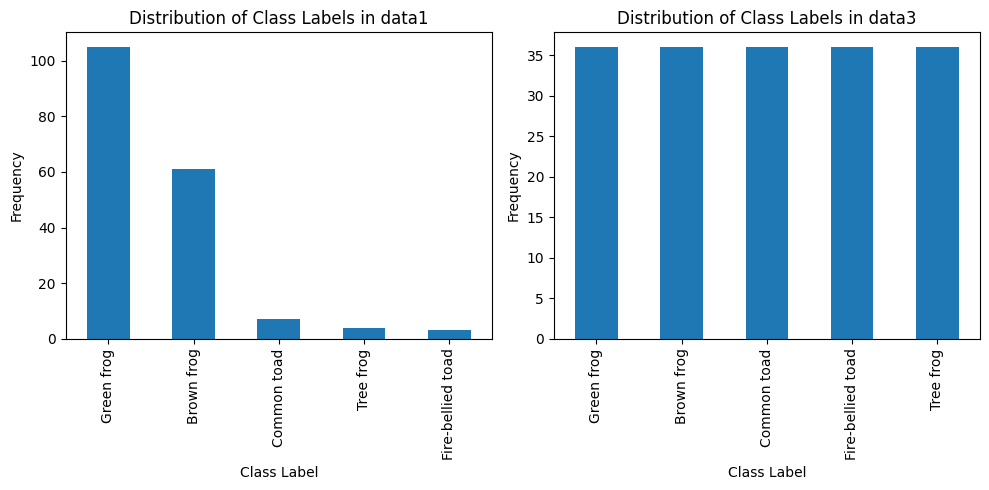

In [ ]:
data3 = pd.read_csv("drive/MyDrive/datasets/ML_A2/amphibians3.csv")



fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data1['frog class'].value_counts().plot(kind='bar', label='data1', ax=axs[0])
axs[0].set_title('Distribution of Class Labels in data1')
axs[0].set_xlabel('Class Label')
axs[0].set_ylabel('Frequency')

data3['frog class'].value_counts().plot(kind='bar', label='data3', ax=axs[1])
axs[1].set_title('Distribution of Class Labels in data3')
axs[1].set_xlabel('Class Label')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

the histogram for data1 shows uneven class label distribution for the 5 classes, with most of the labels coming from the classes "Green Frog" and "Brown Frog". For data3, however, we have an entirely even distribution among the class labels (with each of the 5 classes having 36 labels associated to them). The data gathered in data3 has potential to be more useful for classification compared to data1, since the evenly distributed class labels will help in preventing bias towards certain classes. This can help ensure that the model is trained on a representative sample of the data.

**Q4.2** Use the same encoding technique as used in Q1.1 to encode the `data3` dataset and apply the same normalization technique as used in Q2.1 to normalise the data. For 10 rounds, split the encoded and normalized data3 into 70% training and 30% testing sets,  set the `random_state` equal to the loop counter. Train and test the following models using `data3`: **[1 mark]**
- Zero-R
- K-Nearest Neighbour (K = 1, 5 and 20) 

Calculate the average accuracy of the models for 10 runs and report the results.


In [ ]:
y3 = data3.iloc[:, -1]
X3 = data3.iloc[:, :-1]

In [ ]:
# print(data3)
# print(data1)

In [ ]:
ZeroR_Acc_3 = []
KNN1_Acc_3 = []
KNN5_Acc_3 = []
KNN20_Acc_3 = []

X3_updated = normalise(encode(X3))

round_num = 2

round_reports_d3_knn = {}

for i in range(10):

  X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_updated, y3,  test_size=0.3, random_state=i)
   

  # Training/testing the Zero-R model
  zero_r = DummyClassifier(strategy='most_frequent')
  zero_r.fit(X_train3, y_train3)
  y_pred3 = zero_r.predict(X_test3)
  ZeroR_Acc_3.append(accuracy_score(y_test3, y_pred3))

  # Training/testing the KNN1 model
  knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
  knn1.fit(X_train3, y_train3)
  y_pred3 = knn1.predict(X_test3)
  KNN1_Acc_3.append(knn1.score(X_test3, y_test3))

  if i == round_num:
        round_reports_d3_knn["KNN1"] = classification_report(y_test3, y_pred3, labels=np.unique(y_test3))

  # Training/testing the KNN5 model
  knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
  knn5.fit(X_train3, y_train3)
  y_pred3 = knn5.predict(X_test3)
  KNN5_Acc_3.append(knn5.score(X_test3, y_test3))

  if i == round_num:
        round_reports_d3_knn["KNN5"] = classification_report(y_test3, y_pred3, labels=np.unique(y_test3))


  # Training/testing the KNN20 model
  knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform', metric='euclidean')
  knn20.fit(X_train3, y_train3)
  y_pred3 = knn20.predict(X_test3)
  KNN20_Acc_3.append(knn20.score(X_test3, y_test3))

  if i == round_num:
        round_reports_d3_knn["KNN20"] = classification_report(y_test3, y_pred3, labels=np.unique(y_test3))




print("Accuracy of ZeroR: \tdata1:", np.mean(ZeroR_Acc_1).round(2),"\tdata3:",np.mean(ZeroR_Acc_3).round(2))
print("Accuracy of KNN(1): \tdata1:", np.mean(KNN1_Acc_2).round(2),"\tdata3:", np.mean(KNN1_Acc_3).round(2))
print("Accuracy of KNN(5): \tdata1:", np.mean(KNN5_Acc_2).round(2),"\tdata3:", np.mean(KNN5_Acc_3).round(2))
print("Accuracy of KNN(20): \tdata1:", np.mean(KNN20_Acc_2).round(2),"\tdata3:", np.mean(KNN20_Acc_3).round(2))

Accuracy of ZeroR: 	data1: 0.59 	data3: 0.14
Accuracy of KNN(1): 	data1: 0.54 	data3: 0.76
Accuracy of KNN(5): 	data1: 0.58 	data3: 0.65
Accuracy of KNN(20): 	data1: 0.63 	data3: 0.44


In [ ]:
print("DATA 1\n")
for k, v in round_reports_d1_knn.items():
    print(f"{k}: \n\n")
    print(v)
    print("------")

print("\n---\n")

print("DATA 3\n")
for k, v in round_reports_d3_knn.items():
    print(f"{k}: \n\n")
    print(v)
    print("------")

DATA 1

KNN1: 


                   precision    recall  f1-score   support

       Brown frog       0.50      0.43      0.46        21
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.63      0.66      0.64        29
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.52        54
        macro avg       0.23      0.22      0.22        54
     weighted avg       0.53      0.52      0.53        54

------
KNN5: 


                   precision    recall  f1-score   support

       Brown frog       0.53      0.48      0.50        21
      Common toad       0.00      0.00      0.00         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.60      0.72      0.66        29
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.57        54
        macro avg 

**Q4.3** Discuss any differences you observe between the results of these KNN classifiers on data1 (Q2.2) and data3. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.* 

by analyzing the results, we can see that ZeroR performs very poorly on data3. As pointed out before, ZeroR simply predicts the most common class in the dataset, which in the case of data3, is not at all representative of the true class distribution in the test set. for this dataset, ZeroR is getting the answer correct approximately 1/5 of the times (since we have 5 classes). We note that this number won't be exact since we are not stratifying on the train/test split, so ratio of class labels in the test set can vary. For data1, since the data itself mostly consists of the class "Green Frog" and "Brown Frog", using ZeroR will give much better results, as expected. 


On the other hand, the KNN models generally perform better on data3. This suggests that there might be some separations in the data that KNN models are able to learn and utilize to make accurate predictions. However, as the value of K increases, the performance of the KNN models for data3 starts to deteriorate. This could be due to the fact that data3 has a balanced class distribution, and as K increases, the model starts to consider more and more neighbors when making predictions, which can lead to the inclusion of data which is irrelevant/noisy to the class that is desired to be predicted. 

This occurrence can be further emphasized by looking at the classification_report for a specific round of data3. As an example, in KNN20 the precision and recall values for the Brown frog and Green frog classes are lower than that seen in KNN1 and KNN5. A point worth noting is that for these two classes, the higher that K is considered, the lower the scores for these classes is becoming (eventually reaching 0 for K=20, meaning the model has failed to correctly identify any instances of these particular classes).This can be due to there being very high distance between the different instances labelled with these two classes, meaning instances with other class labels will be coming between them. Thus, when K increases, other classes are predicted.

<br>


For data1, however, as K increases, the performance of the KNN model is improving. This could be due to the fact that data1 has a class imbalance, with some classes having very few instances (as opposed the data3, where all classes have the same distributuion). As K increases for data1, the classifier starts to consider instances that are further away from the query instance, which may include instances from the classes with fewer instances. This then helps to improve the classification performance for these mentioned classes.

This occurrence can be further emphasized by looking at the classification_report for a specific round of data1. The precision and recall values are always 0 in all three KNN models for all classes except "Brown Frog" and "Tree Frog". As K increases, the score values for these two classes are improving, meaning that a higher number of Brown Frogs are being correctly predicted as Brown Frogs, and a higher number of Green Frogs are being correctly predicted as Green Frogs.

<br>

Having considered the effects of increasing K when using KNN for both data1, and data3, it is apparent that a high value for K will result in the classifier working better for data1, and working worse for data3. 










# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Arya Araban
   
   <b>Dated</b>: 4/10/2023